In [8]:
# pd & np libraries to make life easier
import pandas as pd
import numpy as np

import prepare

# visualizers I'll be using
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# to perform stats tests
from scipy import stats

# all sklearn lib's functs
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support



#import all functions created in acquire , prepare & explore

import acquire
import model
import explore

# ignore warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Timmy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Timmy\AppData\Local\Temp\ipykernel_22484\3571659757.py", line 33, in <cell line: 33>
    import model
  File "C:\Users\Timmy\model.py", line 125, in <module>
    for col in df.columns:
NameError: name 'df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Timmy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1982, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Timmy\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\Timmy\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1012, in structured_traceback
    return VerboseTB.stru

In [ ]:
#Read TELCO data from MySQL using the get_telco_data() function in acquire.py

In [3]:
# read TELCO data from sql
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
# initial data summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


### Clean, Prep 

In [8]:
# Drop duplicate columns
df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

In [9]:
# Drop null values stored as whitespace    
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']

In [10]:
# Convert to correct datatype
df['total_charges'] = df.total_charges.astype(float)

In [11]:
 # Convert binary categorical variables to numeric
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [12]:
# Get dummies for non-binary categorical variables
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)

In [13]:
 # Concatenate dummy dataframe to original 
df = pd.concat([df, dummy_df], axis=1)

In [14]:
# Drop unnecessary columns
df.drop(columns=['gender','partner','dependents','phone_service', \
                     'multiple_lines','online_security','online_backup', \
                     'device_protection','tech_support','streaming_tv', \
                     'streaming_movies','paperless_billing'], inplace=True)

In [15]:
# #combine all to a function and add to prepare.py
# def prep_telco_data(df):
#     df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
#     df['total_charges'] = df['total_charges'].str.strip()
#     df = df[df.total_charges != '']
#     df['total_charges'] = df.total_charges.astype(float)
#     df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
#     df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
#     df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
#     df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
#     df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
#     df['churn_encoded'] = df.churn.replace({'Yes': 1, 'No': 0})
#     dummy_df = pd.get_dummies(df[['multiple_lines', \
#                               'online_security', \
#                               'online_backup', \
#                               'device_protection', \
#                               'tech_support', \
#                               'streaming_tv', \
#                               'streaming_movies', \
#                               'contract_type', \
#                               'internet_service_type', \
#                               'payment_type']], dummy_na=False, \
#                               drop_first=True)
#     df = pd.concat([df, dummy_df], axis=1)
#     df.drop(columns=['gender','partner','dependents','phone_service', \
#                      'multiple_lines','online_security','online_backup', \
#                      'device_protection','tech_support','streaming_tv', \
#                      'streaming_movies','paperless_billing'], inplace=True)
#     return df

In [16]:
# df = prep_telco_data(df)

In [17]:
df.head()

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,No,One year,DSL,Mailed check,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,...,1,0,0,0,0,1,0,0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   monthly_charges                        7032 non-null   float64
 3   total_charges                          7032 non-null   float64
 4   churn                                  7032 non-null   object 
 5   contract_type                          7032 non-null   object 
 6   internet_service_type                  7032 non-null   object 
 7   payment_type                           7032 non-null   object 
 8   gender_encoded                         7032 non-null   int64  
 9   partner_encoded                        7032 non-null   int64  
 10  dependents_encoded                     7032 non-null   int64  
 11  phon

### start to look at the data set to find anything that may jump out

In [19]:
df.churn_encoded.value_counts()

0    5163
1    1869
Name: churn_encoded, dtype: int64

In [16]:
#overall churn rate of df set
df.churn_encoded.mean()

0.26578498293515357

Text(0.5, 0, 'Churned')

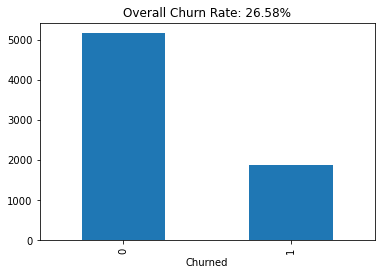

In [17]:
df.churn_encoded.value_counts().sort_index().plot.bar()
churn_rate = df.churn_encoded.mean()
plt.title(f"Overall Churn Rate: {churn_rate:.2%}")
plt.xlabel('Churned')

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

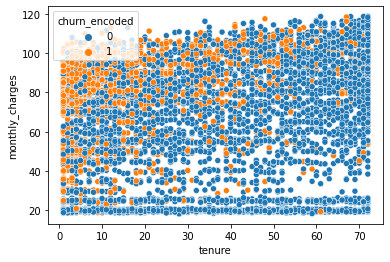

In [22]:
sns.scatterplot(x="tenure", y="monthly_charges", hue="churn_encoded", data=df)

<AxesSubplot:xlabel='churn', ylabel='count'>

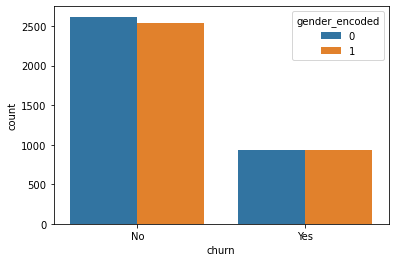

In [23]:
sns.countplot(x="churn", data=df, hue="gender_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

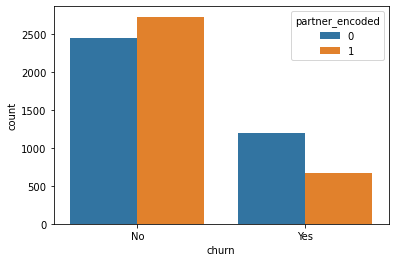

In [24]:
sns.countplot(x="churn", data=df, hue="partner_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

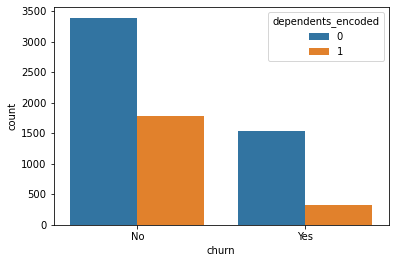

In [25]:
sns.countplot(x="churn", data=df, hue="dependents_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

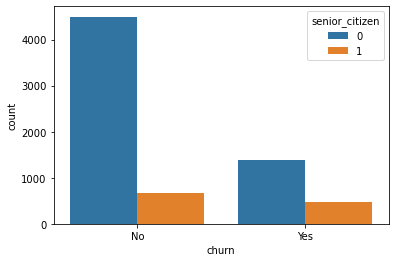

In [26]:
sns.countplot(x="churn", data=df, hue="senior_citizen")

<AxesSubplot:xlabel='churn', ylabel='count'>

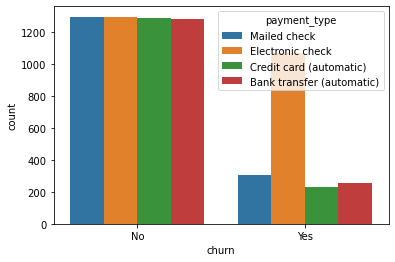

In [27]:
#electronic check has the highest rate of churn
sns.countplot(x="churn", data=df, hue="payment_type")

<AxesSubplot:xlabel='churn', ylabel='count'>

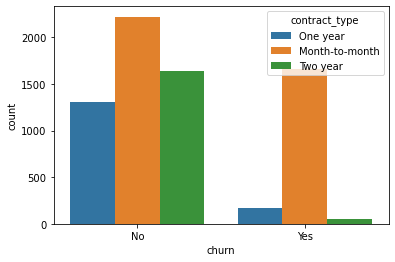

In [28]:
#month to month has the highest rate of churn
sns.countplot(x="churn", data=df, hue="contract_type")

<AxesSubplot:xlabel='churn', ylabel='count'>

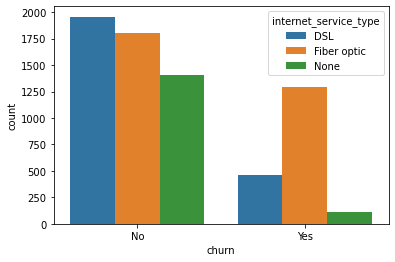

In [29]:
#fiber optic has the highest rate of churn
sns.countplot(x="churn",  data=df, hue="internet_service_type") 

### from initial look, examine variables that show promise

In [31]:
features = ['internet_service_type', 'contract_type', 'payment_type', 'senior_citizen']

In [32]:
list(enumerate(features))

[(0, 'internet_service_type'),
 (1, 'contract_type'),
 (2, 'payment_type'),
 (3, 'senior_citizen')]

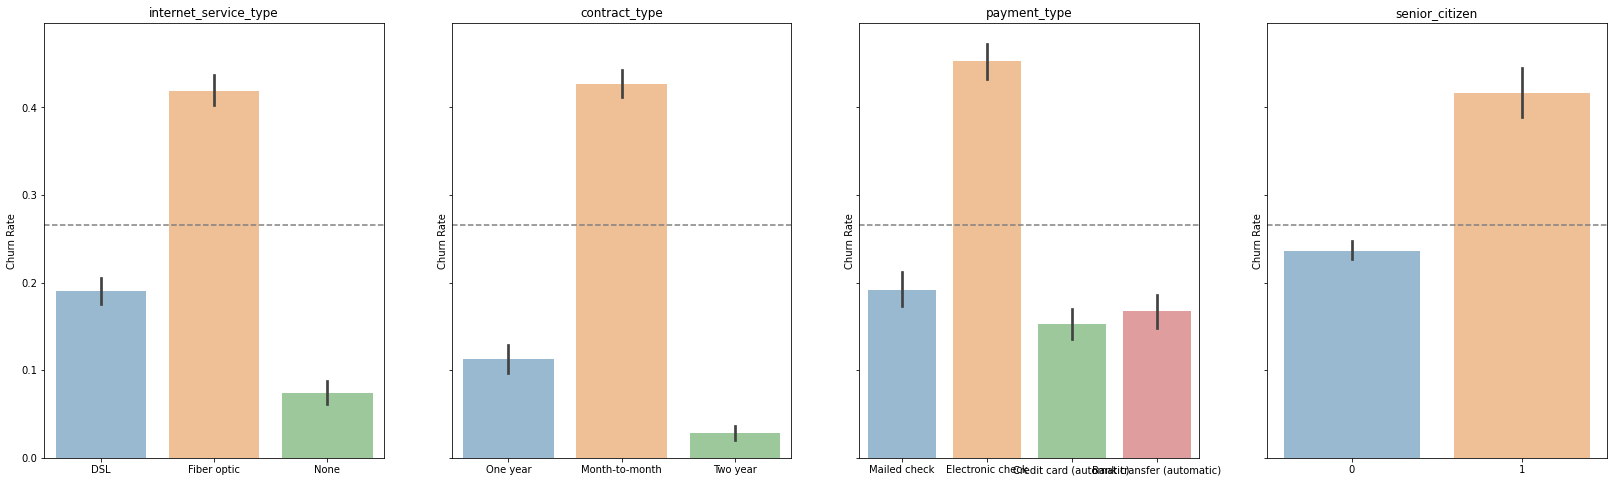

In [33]:
churn_rate = df.churn_encoded.mean()
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(28, 8), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=df, ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

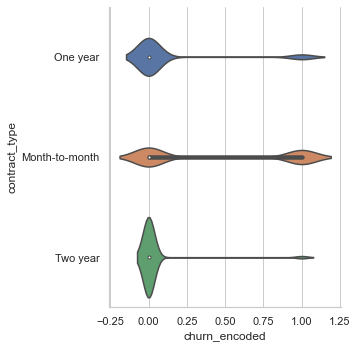

In [34]:
# Catplot with kind="count"
sns.set_theme(style="whitegrid")
sns.catplot(x="churn_encoded", y="contract_type", data=df, kind="violin")

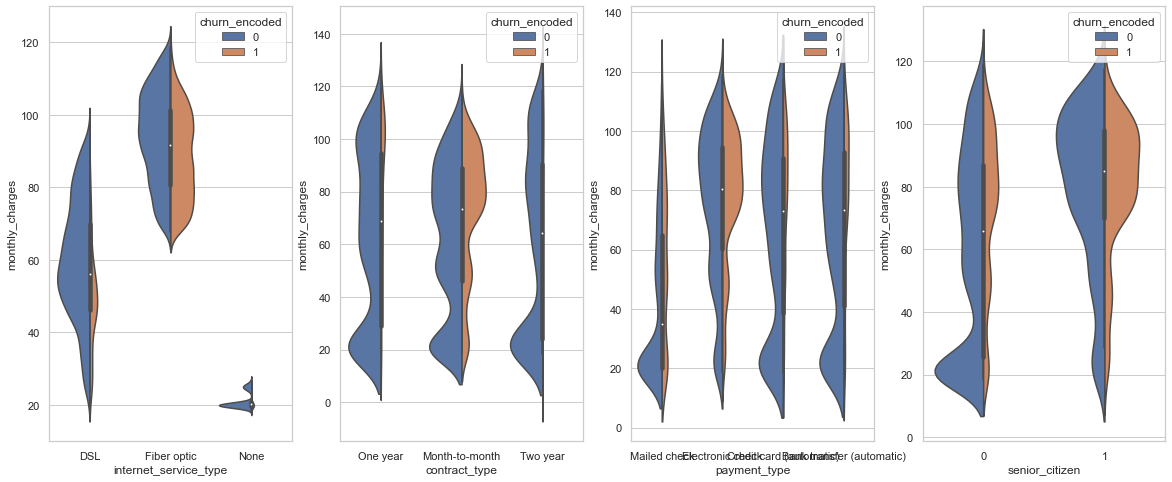

In [35]:
#shows that there is a higher cost of service for fiber optic, high churn, my guess is those are month to month paid with echeck
features = ['internet_service_type', 'contract_type', 'payment_type','senior_citizen']
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))

for i, feature in enumerate(features):
    sns.violinplot(
        feature,
        "monthly_charges",
        hue="churn_encoded",
        data=df,
        split=True,
        scale = 'count',
        ax=ax[i],
        
    )

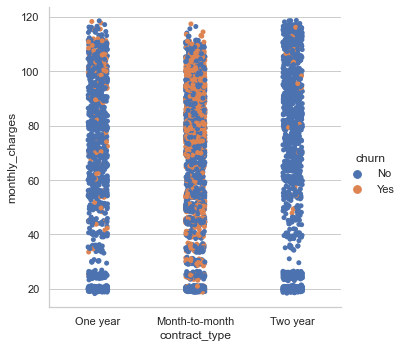

In [36]:
# Using a Catplot, month to month with charges over 60, high churn
sns.catplot(x="contract_type", y="monthly_charges", data=df, hue="churn")

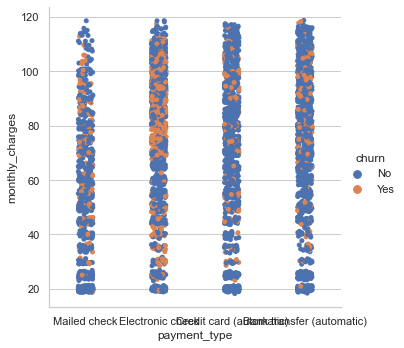

In [37]:
#electronic check with charges over 60, high churn
sns.catplot(x="payment_type", y="monthly_charges", data=df, hue="churn")

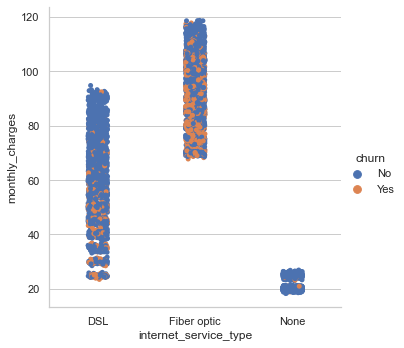

In [38]:
# Using a Catplot
sns.catplot(x="internet_service_type", y="monthly_charges", data=df, hue="churn")

(0.0, 73.0)

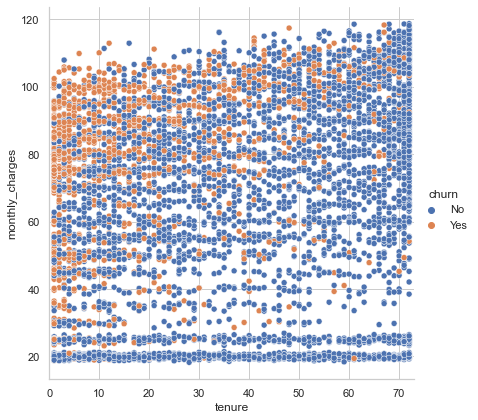

In [40]:
#churn is happening sub 10 month tenure, meaning month to month contract has highest churn
sns.relplot(x="tenure", y="monthly_charges", hue="churn", data=df, height=6, aspect=1)
plt.xlim(0, 73)

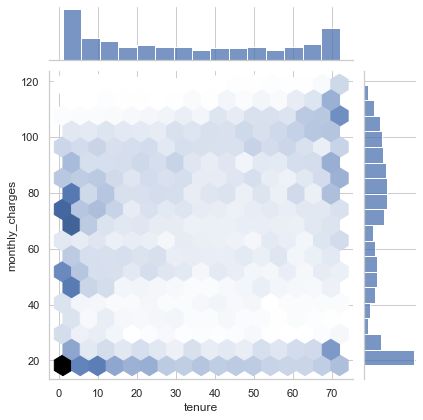

In [41]:
#low tenure, high monthly cost more churn
sns.jointplot("tenure", "monthly_charges", data=df, kind='hex')

In [42]:
#electronic check customers make up 33.6% of customer base and churn at 15.2%
pd.crosstab(df.churn, df.payment_type, margins=True, normalize=True)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
churn,,,,,
No,0.182594,0.183305,0.184016,0.1843,0.734215
Yes,0.036689,0.032992,0.152304,0.0438,0.265785
All,0.219283,0.216297,0.336320,0.2281,1.000000


In [43]:
#MTM make up 55.1% of customer base and churn at 23.5%
pd.crosstab(df.churn, df.contract_type, margins=True, normalize=True)

contract_type,Month-to-month,One year,Two year,All
churn,,,,
No,0.315700,0.185722,0.232793,0.734215
Yes,0.235353,0.023606,0.006826,0.265785
All,0.551052,0.209329,0.239619,1.000000


In [44]:
#fiber optic customers make up 44.0% of customer base and churn at 18.4%
pd.crosstab(df.churn, df.internet_service_type, margins=True, normalize=True)

internet_service_type,DSL,Fiber optic,None,All
churn,,,,
No,0.278299,0.255830,0.200085,0.734215
Yes,0.065273,0.184443,0.016069,0.265785
All,0.343572,0.440273,0.216155,1.000000


In [45]:
#senior citizens are 16.2% of customer base and churn at 41.7%
pd.crosstab(df.churn, df.senior_citizen, margins=True, normalize=True)

senior_citizen,0,1,All
churn,,,
No,0.639505,0.094710,0.734215
Yes,0.198094,0.067691,0.265785
All,0.837600,0.162400,1.000000


In [46]:
#Median tenure for churn customers is 10 months
df[df.churn == 'Yes'].tenure.median()

10.0

In [48]:
#mean tenure, outliers towards the high end, go with median
df[df.churn == 'Yes'].tenure.mean()

17.979133226324237

In [49]:
df[df.churn == 'Yes'].tenure.describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

In [50]:
df[df.churn == 'No'].tenure.describe()

count    5163.00000
mean       37.65001
std        24.07694
min         1.00000
25%        15.00000
50%        38.00000
75%        61.00000
max        72.00000
Name: tenure, dtype: float64

In [51]:
df[df.internet_service_type == 'Fiber optic'].tenure.describe()

count    3096.000000
mean       32.917959
std        24.425332
min         1.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

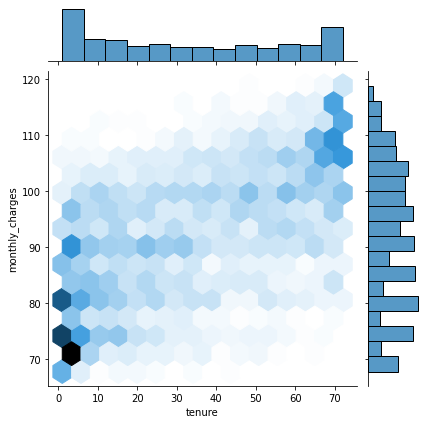

In [52]:
sns.jointplot("tenure", "monthly_charges", data=df[df.internet_service_type == 'Fiber optic'], kind='hex')

In [71]:
#churners pay 13.1$ more per month
df[df.churn == 'Yes'].monthly_charges.describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: monthly_charges, dtype: float64

In [72]:
df[df.churn == 'No'].monthly_charges.describe()

count    5163.000000
mean       61.307408
std        31.094557
min        18.250000
25%        25.100000
50%        64.450000
75%        88.475000
max       118.750000
Name: monthly_charges, dtype: float64

In [73]:
churners = df[df.churn == 'Yes']
churners

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
2,0,4,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,...,1,0,0,0,0,1,0,0,0,1
18,1,45,62.70,2791.50,Yes,One year,DSL,Credit card (automatic),0,0,...,0,0,1,1,0,0,0,1,0,0
19,1,1,25.10,25.10,Yes,Month-to-month,DSL,Electronic check,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,1,21,96.80,2030.30,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),0,0,...,1,0,1,0,0,1,0,0,0,0
7023,1,9,83.85,790.15,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,1,0,0,1,0,0,1,0
7036,0,1,70.15,70.15,Yes,Month-to-month,Fiber optic,Mailed check,1,0,...,0,0,0,0,0,1,0,0,0,1
7037,0,4,20.95,85.50,Yes,Month-to-month,None,Bank transfer (automatic),1,0,...,0,1,0,0,0,0,1,0,0,0


In [74]:
churners.internet_service_type == 'Fiber optic'

2        True
3        True
4        True
18      False
19      False
        ...  
7020     True
7023     True
7036     True
7037    False
7039     True
Name: internet_service_type, Length: 1869, dtype: bool

In [75]:
churners[churners.internet_service_type == 'Fiber optic'].tenure.median()

13.0

In [76]:
churners[churners.contract_type == 'Month-to-month'].tenure.median()

7.0

In [77]:
churners[churners.payment_type == 'Electronic check'].tenure.median()

9.0

In [78]:
df.monthly_charges.mean()

64.7982081911263

In [79]:
churners.monthly_charges.mean()

74.44133226324232

In [80]:
#Ho : Mean of monthly charges of churned month to month customers >= Mean of monthly charges of all customers
#Ha : Mean of monthly charges of churned month to month customers < Mean of monthly charges of all customers
# We fail to reject Ho
churners[churners.contract_type == 'Month-to-month'].monthly_charges.mean()

73.01939577039263

In [82]:
alpha=.05
churn_sample = churners[churners.contract_type == 'Month-to-month'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

13.886804146146698 7.433197012217004e-42 0.05


In [83]:
if p/2 < alpha:
    print("We fail to reject Ho")
elif t > 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

We fail to reject Ho


In [63]:
#Ho : Mean of monthly charges of churned electronic check customers >= Mean of monthly charges of all customers
#Ha : Mean of monthly charges of churned electronic customers < Mean of monthly charges of all customers
# We fail to reject Ho
churners[churners.payment_type == 'Electronic check'].monthly_charges.mean()

78.70098039215678

In [84]:
alpha=.05
churn_sample = churners[churners.payment_type == 'Electronic check'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

21.58032805417192 2.4496013669103227e-86 0.05


In [85]:
if p/2 < alpha:
    print("We fail to reject Ho")
elif t > 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

We fail to reject Ho


In [64]:
#Ho : Mean of monthly charges of churned fiber customers >= Mean of monthly charges of all customers
#Ha : Mean of monthly charges of churned fiber customers < Mean of monthly charges of all customers
#### We fail to reject Ho
churners[churners.internet_service_type == 'Fiber optic'].monthly_charges.mean()

88.12648419429449

In [65]:
alpha=.05
churn_sample = churners[churners.internet_service_type == 'Fiber optic'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

70.70214561371345 0.0 0.05


In [67]:
if p/2 < alpha:
    print("We fail to reject Ho")
elif t > 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

We fail to reject Ho


In [66]:
churners[churners.senior_citizen == 1].monthly_charges.mean()

80.71344537815128

In [65]:
fiber_churn=churners[churners.internet_service_type == 'Fiber optic']

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

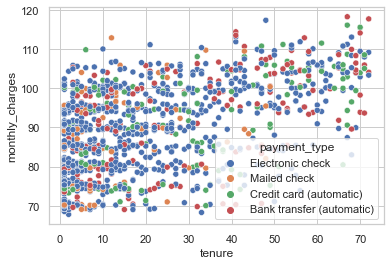

In [66]:
sns.scatterplot(x="tenure", y="monthly_charges", data=fiber_churn, hue="payment_type")

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

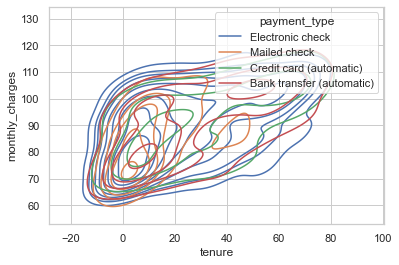

In [67]:
sns.kdeplot(x="tenure", y="monthly_charges", data=fiber_churn, hue="payment_type",kind='kde')

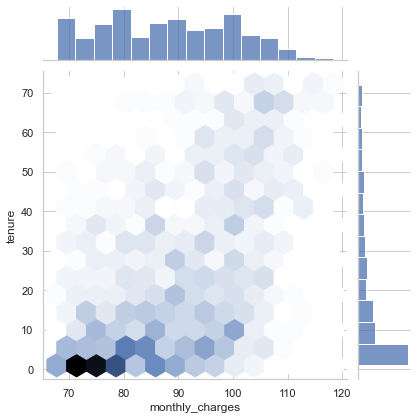

In [68]:
sns.jointplot("monthly_charges", "tenure", data=fiber_churn, kind='hex')

<AxesSubplot:>

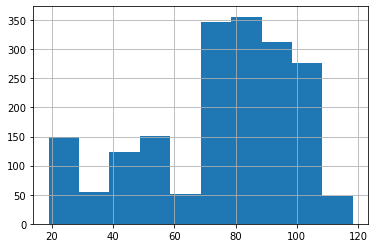

In [18]:
#one tailed t test, monthly charges are higher for customers who churn than those that dont
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()

In [19]:
#Ho: mean of monthly charges of churned customers is >= mean of monthly charges of all customers
#Ha: mean of monthly charges of churned customers is < mean of monthly charges of all customers
alpha=.05
churn_sample = df[df.churn == 'Yes'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

16.90140234289535 4.80131988951768e-60 0.05


In [20]:
if p/2 < alpha:
    print("We fail to reject Ho")
elif t > 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

We fail to reject Ho


<AxesSubplot:>

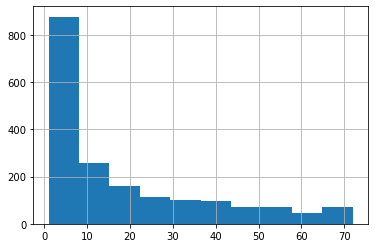

In [21]:
#one tail t test, majority of churned customers are month to month customers, aka tenure less than 12
churn_sample = df[df.churn == 'Yes'].tenure

churn_sample.hist()

In [22]:
#Ho: mean length tenure of churned customers is <= mean length tenure of all customers
#Ha: mean length tenure of churned customers is > mean length tenure of all customers
alpha=.05
churn_sample = df[df.churn == 'Yes'].tenure
overall_mean = df.tenure.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

-31.96865819544077 1.508565587390666e-179 0.05


In [23]:
if p/2 > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

We fail to reject Ho


<AxesSubplot:>

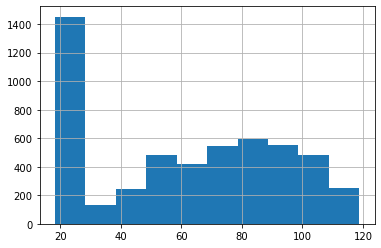

In [24]:
no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()

In [25]:
# charges of customers who churn significantly different than those who do not churn

# Ho: charges of customers who churn equals that of those who don't churn.

# Ha: charges of customers who churn is not equal to that of those who don't churn.

In [26]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p
#-t value and 0 p, significantly different

(-69.25919853046089, 0.0)

In [27]:
r_monthly_charges, _ = stats.pearsonr(df.churn_encoded, df.monthly_charges)
r_tenure, _ = stats.pearsonr(df.churn_encoded, df.tenure)

print('Correlation between churn and monthly_charges')
print(f'  r = {r_monthly_charges:.3f}')
print('Correlation between churn and tenure')
print(f'  r = {r_tenure:.3f}')

Correlation between churn and monthly_charges
  r = 0.193
Correlation between churn and tenure
  r = -0.354


In [28]:
r, p = stats.pearsonr(df.churn_encoded, df.monthly_charges)
r, p

(0.1928582184700866, 6.760843117985555e-60)

In [29]:
index = ['Churn', 'No Churn']
columns = ['contract_type', 'internet_service_type']

observed = pd.DataFrame([[100, 50], [120, 28]], index=index, columns=columns)
n = observed.values.sum()

expected = pd.DataFrame([[.372, .132], [.367, .130]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
          contract_type  internet_service_type
Churn               100                     50
No Churn            120                     28
---
Expected
          contract_type  internet_service_type
Churn           110.856                 39.336
No Churn        109.366                 38.740
---

chi^2 = 7.9656
p     = 0.0048


In [31]:
pd.crosstab(df.churn, df.internet_service_type, margins=True, normalize=True)

internet_service_type,DSL,Fiber optic,None,All
churn,,,,
No,0.278299,0.255830,0.200085,0.734215
Yes,0.065273,0.184443,0.016069,0.265785
All,0.343572,0.440273,0.216155,1.000000


In [32]:
istchurn=pd.crosstab(df.churn, df.internet_service_type, margins=True, normalize=True)

In [33]:
chi2, p, degf, expected=stats.chi2_contingency(istchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[100  50]
 [120  28]]
---
Expected

[[0.2522559  0.32325508 0.15870404 0.73421502]
 [0.09131634 0.11701796 0.05745068 0.26578498]
 [0.34357224 0.44027304 0.21615472 1.        ]]
---

chi^2 = 0.1036
p     = 1.0000


In [34]:
pd.crosstab(df.churn, df.contract_type, margins=True, normalize=True)

contract_type,Month-to-month,One year,Two year,All
churn,,,,
No,0.315700,0.185722,0.232793,0.734215
Yes,0.235353,0.023606,0.006826,0.265785
All,0.551052,0.209329,0.239619,1.000000


In [35]:
ctchurn = pd.crosstab(df.churn, df.contract_type, margins=True, normalize=True)

In [36]:
chi2, p, degf, expected=stats.chi2_contingency(ctchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[100  50]
 [120  28]]
---
Expected

[[0.4045909  0.15369234 0.17593178 0.73421502]
 [0.14646143 0.05563645 0.0636871  0.26578498]
 [0.55105233 0.20932878 0.23961889 1.        ]]
---

chi^2 = 0.1677
p     = 0.9999


In [37]:
pd.crosstab(df.churn, df.payment_type, margins=True, normalize=True)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
churn,,,,,
No,0.182594,0.183305,0.184016,0.1843,0.734215
Yes,0.036689,0.032992,0.152304,0.0438,0.265785
All,0.219283,0.216297,0.336320,0.2281,1.000000


In [38]:
ptchurn = pd.crosstab(df.churn, df.payment_type, margins=True, normalize=True)

In [39]:
chi2, p, degf, expected=stats.chi2_contingency(ptchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[100  50]
 [120  28]]
---
Expected

[[0.16100107 0.15880845 0.24693096 0.16747453 0.73421502]
 [0.0582822  0.05748848 0.08938872 0.06062558 0.26578498]
 [0.21928328 0.21629693 0.33631968 0.22810011 1.        ]]
---

chi^2 = 0.0918
p     = 1.0000


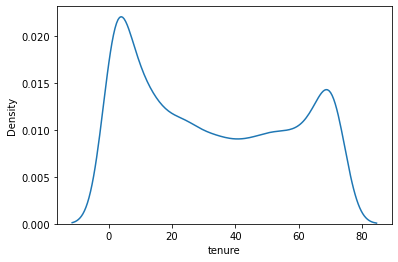

In [43]:
sns.distplot(df.tenure ,hist=False, bins=10);

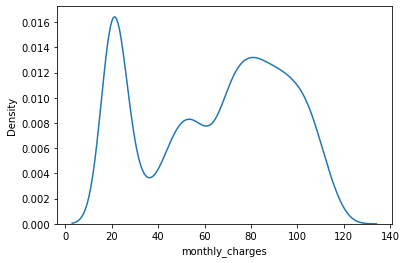

In [45]:
sns.distplot(df.monthly_charges ,hist=False, bins=10);

<AxesSubplot:>

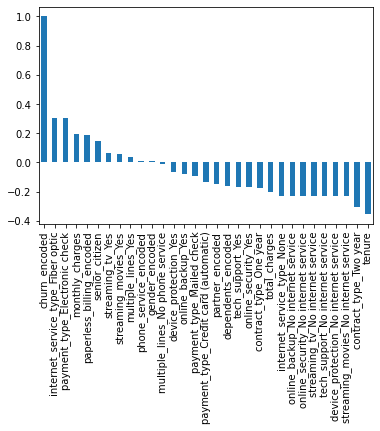

In [46]:
df.corr()['churn_encoded'].sort_values(ascending = False).plot(kind='bar')

### Exploration summary and conclusion:

#### Key Findings:
##### The overall churn rate for customers at Telco is 26.6%.
###### Fiber optic customers make up 44.0% of customer base and churn at 18.4%.
###### Month to month contract customers make up 55.1% of customer base and churn at 23.5%.
###### Electronic check payment type customers make up 33.6% of customer base and churn at 15.2%.
###### Senior citizens make up 16% of customer base and churn at 41.7%
##### Median tenure of churned customers: 10 months.
##### Median tenure of month to month customers that have churned: 7 months.
##### Median tenure of electronic check payment customers that have churned: 9 months.
##### Average monthly charges: 64.80.
##### Average monthly charges of customers who have churned: 74.44, 9.64 higher than average.
##### Average monthly charges of fiber customers: 88.13, 23.33 higher than average.
##### Average monthly charges of month to month customers: 73.02, 8.22 higher than average.
##### Average monthly charges of electronic check payment customers: 78.70, 13.90 higher than average.

## Tested Hypotheses and Results
#### 1. Ho : Mean of monthly charges of churned customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned customers < Mean of monthly charges of all customers
#### We fail to reject Ho
___
#### 2. Ho: mean length tenure of churned customers is <= mean length tenure of all customers
####    Ha: mean length tenure of churned customers is > mean length tenure of all customers
#### We fail to reject Ho
___
#### 3. Charges of customers who churn significantly different than those who do not churn
####    Ho: Charges of customers who churn equals that of those who don't churn.
####    Ha: Charges of customers who churn is not equal to that of those who don't churn.
#### We reject Ho, -t value and 0 p, significantly different
___
#### 4. Ho : Mean of monthly charges of churned fiber customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned fiber customers < Mean of monthly charges of all customers
#### We fail to reject Ho
___
#### 5. Ho : Mean of monthly charges of churned month to month customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned month to month customers < Mean of monthly charges of all customers
#### We fail to reject Ho
___
#### 6. Ho : Mean of monthly charges of churned electronic check customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned electronic customers < Mean of monthly charges of all customers
#### We fail to reject Ho

In [192]:
# test prep_telco_data & train_validate_test
train, validate, test = prepare.train_validate_test(df)

AttributeError: 'DataFrame' object has no attribute 'churn_encoded'

In [87]:
#modeling
#identify baseline prediction
train.churn.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

In [88]:
train.shape, validate.shape, test.shape

((3937, 35), (1688, 35), (1407, 35))

In [89]:
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,No,One year,DSL,Credit card (automatic),1,0,...,0,0,0,1,0,0,0,1,0,0
1915,0,71,85.45,6028.95,No,One year,Fiber optic,Credit card (automatic),0,0,...,0,0,0,1,0,1,0,1,0,0
5054,0,35,25.75,882.55,No,Month-to-month,None,Electronic check,1,1,...,0,1,0,0,0,0,1,0,1,0
2355,0,1,19.20,19.20,No,Month-to-month,None,Mailed check,0,1,...,0,1,0,0,0,0,1,0,0,1
6279,1,20,54.00,1055.90,No,One year,DSL,Mailed check,0,0,...,0,0,0,1,0,0,0,0,0,1


In [90]:
#identify baseline
#baseline will be mode, no churn

In [194]:
baseline_accuracy = (train.churn_encoded ==0).mean()
baseline_accuracy

0.7343154686309372

In [92]:
#modeling
#review current features, narrow down to selected features
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3937 non-null   int64  
 1   tenure                                 3937 non-null   int64  
 2   monthly_charges                        3937 non-null   float64
 3   total_charges                          3937 non-null   float64
 4   churn                                  3937 non-null   object 
 5   contract_type                          3937 non-null   object 
 6   internet_service_type                  3937 non-null   object 
 7   payment_type                           3937 non-null   object 
 8   gender_encoded                         3937 non-null   int64  
 9   partner_encoded                        3937 non-null   int64  
 10  dependents_encoded                     3937 non-null   int64  
 11  p

In [93]:
#features I want included, ensuring target is not in the features
features = ['senior_citizen', 'tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']
#what our target is
target=['churn_encoded']

In [94]:
# setup our X inputs and y target variable for each split
# listed features will be input into features
X_train = train[features] 
y_train = train[target] 

X_validate = validate[features] 
y_validate = validate[target]

X_test = test[features] 
y_test = test[target]

In [95]:
# create, new Decision Tree model
# Be sure to set the max_depth argument

tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [96]:
#train/fit our model on the training data

tree1 = tree1.fit(X_train, y_train)
tree1

DecisionTreeClassifier(max_depth=3, random_state=123)

In [196]:
#create a function to calculate the metrics
def get_metrics(mod, X, y):
    baseline_accuracy = (train.churn == 0).mean()
    y_pred = mod.predict(X)
    accuracy = mod.score(X, y)
    prfs = pd.DataFrame(precision_recall_fscore_support(y, y_pred), index=['precision', 'recall', 'f1-score', 'support'])
    
    print(f'''
        The accuracy for our model is: {accuracy:.2%} 
    ''')
    return prfs

In [98]:
# Now we'll make a SET OF PREDICTIONS using this trained model
y_pred = tree1.predict(X_train)
# ESTIMATE THE PROBABLITIES for each class
y_pred_proba = tree1.predict_proba(X_train)

In [99]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


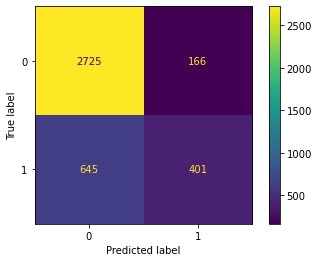

In [100]:
plot_confusion_matrix(tree1, X_train, y_train)

In [101]:

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.38      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.76      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



In [102]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

Tree of 3 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.808605,0.707231,0.794006,0.757918,0.781672
recall,0.942580,0.383365,0.794006,0.662973,0.794006
f1-score,0.870468,0.497210,0.794006,0.683839,0.771299
support,2891.000000,1046.000000,0.794006,3937.000000,3937.000000


In [103]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [104]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 2891
Positive Cases: 1046
churn_encoded
0                2891
1                1046
dtype: int64


In [105]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.794005588011176 

True Positive Rate/Sensitivity/Recall/Power: 0.38336520076481834 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0574195780006918 

True Negative Rate/Specificity/Selectivity: 0.9425804219993082 

False Negative Rate/Miss Rate: 0.6166347992351816 

Precision/PPV: 0.7072310405643739 

F1 Score: 0.49721016738995655 

Support (0): 2891 

Support (1): 1046


In [106]:
# Finding Optimal max_depth

In [107]:
# loop to adjust depth
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_pred = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_pred, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.734315     0.0  0.734315     0.367158      0.539219
recall        1.000000     0.0  0.734315     0.500000      0.734315
f1-score      0.846807     0.0  0.734315     0.423404      0.621824
support    2891.000000  1046.0  0.734315  3937.000000   3937.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.808605     0.707231  0.794006     0.757918      0.781672
recall        0.942580     0.383365  0.794006     0.662973      0.794006
f1-score      0.870468     0.497210  0.794006     0.683839      0.771299
support    2891.000000  1046.000000  0.794006  3937.000000   3937.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.808605     0.707231  0.794006     0.757918      0.781672
recall        0.942580     0.383365  0.794006     0.662973      0.794006

In [108]:
# Which model performs best on your out-of-sample data, the validate set?

In [109]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,25):
    tree = DecisionTreeClassifier(max_depth= i, random_state=123) #make model 

    tree = tree.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=tree.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)#use model on validate
    
    output = {
        "max_depth":i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.794006,0.776066,0.017939
2,3,0.794006,0.776066,0.017939
3,4,0.800102,0.777251,0.022850
4,5,0.807468,0.779028,0.028439
5,6,0.813056,0.778436,0.034620
6,7,0.826264,0.764218,0.062046
7,8,0.836932,0.758886,0.078045
8,9,0.852172,0.755332,0.096840
9,10,0.867666,0.750000,0.117666


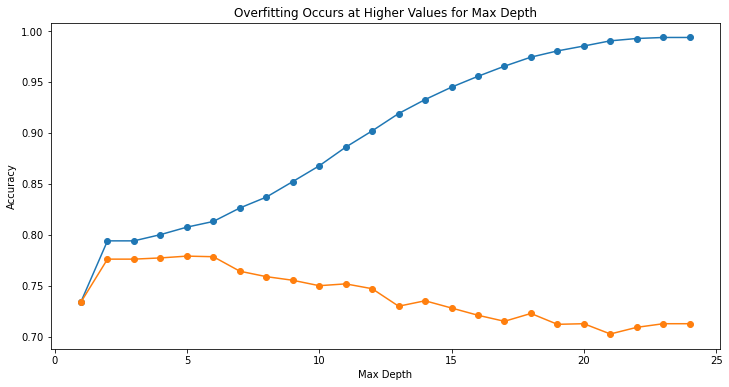

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [111]:
#max depth of 5 produces accuracy of train = 0.813056 validate= 0.778436 difference = 0.034620 
#compared to 73.4% baseline

In [112]:
#random forest model

In [113]:
#create the model
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=21, random_state=123)
rf

RandomForestClassifier(max_depth=5, min_samples_leaf=21, random_state=123)

In [114]:
#fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=21, random_state=123)

In [115]:
# Feature Importance
# Evaluate importance, or weight, of each feature.
print(rf.feature_importances_)

[0.01055812 0.33083592 0.10366621 0.07733227 0.13898208 0.20886998
 0.03494767 0.00662988 0.08182586 0.00635202]


In [116]:
# Make Predictions on survival

y_pred = rf.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
# Estimate Probability

# Estimate the probability ofsurvival, using the training data.
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.88614478, 0.11385522],
       [0.82554804, 0.17445196],
       [0.8857572 , 0.1142428 ],
       ...,
       [0.97198578, 0.02801422],
       [0.63433065, 0.36566935],
       [0.80112139, 0.19887861]])

In [118]:
# Evaluate Model
# Compute the Accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.81


In [119]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[2689  202]
 [ 564  482]]


In [120]:
# Create a classificaiton report

# Precision: TP/(tp+FP)
 
# Recall: TP/(TP+FN)
 
# F1-Score: A measure of accuracy. The harmonic mean of precision & recall. The harmonic mean is the reciprocal of the arithmetic mean of the reciprocals.
# F1 between zero and one

# F1-score = harmonic mean = 2/(1/precision+1/recall)
# Support: number of occurrences of each class.
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2891
           1       0.70      0.46      0.56      1046

    accuracy                           0.81      3937
   macro avg       0.77      0.70      0.72      3937
weighted avg       0.79      0.81      0.79      3937



In [121]:
# Validate Model
# Evaluate on Out-of-Sample data

# Compute the accuracy of the model when run on the validate dataset.
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.78


In [122]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

TN, FP, FN, TP

(2689, 202, 564, 482)

In [123]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 2891
Positive Cases: 1046
churn_encoded
0                2891
1                1046
dtype: int64


In [124]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8054356108712217 

True Positive Rate/Sensitivity/Recall/Power: 0.4608030592734226 

False Positive Rate/False Alarm Ratio/Fall-out: 0.06987201660325147 

True Negative Rate/Specificity/Selectivity: 0.9301279833967485 

False Negative Rate/Miss Rate: 0.5391969407265774 

Precision/PPV: 0.7046783625730995 

F1 Score: 0.5572254335260116 

Support (0): 2891 

Support (1): 1046


In [125]:
# Run through steps increasing your min_samples_leaf and decreasing your max_depth.
# loop to adjust depth
for i in range(1, 10):
    # Make the model
    rf = RandomForestClassifier(max_depth=5, min_samples_leaf=i, random_state=123)

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"RF with min samples leaf of {i}")
    print(pd.DataFrame(report))
    print()

RF with min samples leaf of 1
                     0            1  accuracy    macro avg  weighted avg
precision     0.820194     0.708920  0.802134     0.764557      0.790630
recall        0.935662     0.433078  0.802134     0.684370      0.802134
f1-score      0.874132     0.537685  0.802134     0.705908      0.784743
support    2891.000000  1046.000000  0.802134  3937.000000   3937.000000

RF with min samples leaf of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.821635     0.710526  0.803404     0.766081      0.792115
recall        0.935316     0.438815  0.803404     0.687066      0.803404
f1-score      0.874798     0.542553  0.803404     0.708675      0.786526
support    2891.000000  1046.000000  0.803404  3937.000000   3937.000000

RF with min samples leaf of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.820973     0.706337  0.802134     0.763655      0.790516
recall        0.934279     0.436

In [126]:
# Run through steps increasing your min_samples_leaf and decreasing your max_depth.
# loop to adjust depth
for i in range(1, 20):
    # Make the model
    rf = RandomForestClassifier(max_depth=20-i, min_samples_leaf=1+i, random_state=123)

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"RF with max depth of {20-i}")
    print(pd.DataFrame(report))
    print()

RF with max depth of 19
                     0            1  accuracy    macro avg  weighted avg
precision     0.922697     0.904125  0.918466     0.913411      0.917763
recall        0.970253     0.775335  0.918466     0.872794      0.918466
f1-score      0.945878     0.834792  0.918466     0.890335      0.916364
support    2891.000000  1046.000000  0.918466  3937.000000   3937.000000

RF with max depth of 18
                     0            1  accuracy    macro avg  weighted avg
precision     0.900654     0.846066  0.888494     0.873360      0.886151
recall        0.953303     0.709369  0.888494     0.831336      0.888494
f1-score      0.926231     0.771711  0.888494     0.848971      0.885177
support    2891.000000  1046.000000  0.888494  3937.000000   3937.000000

RF with max depth of 17
                     0            1  accuracy    macro avg  weighted avg
precision     0.881570     0.796491  0.863094     0.839031      0.858966
recall        0.939813     0.651052  0.863094     

In [127]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,10):
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf=2*i, random_state=123) #make model 

    rf = rf.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=rf.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = rf.score(X_validate, y_validate)#use model on validate
    
    output = {
        "min_samples_leaf":2*i,
        "max_depth":i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

,min_samples_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,1,0.734315,0.734005,0.000311
1,4,2,0.778258,0.763626,0.014632
2,6,3,0.794768,0.773697,0.021071
3,8,4,0.799086,0.778436,0.020650
4,10,5,0.803404,0.777251,0.026152
5,12,6,0.810008,0.784953,0.025055
6,14,7,0.813818,0.776659,0.037159
7,16,8,0.816104,0.780213,0.035890
8,18,9,0.818898,0.776659,0.042239


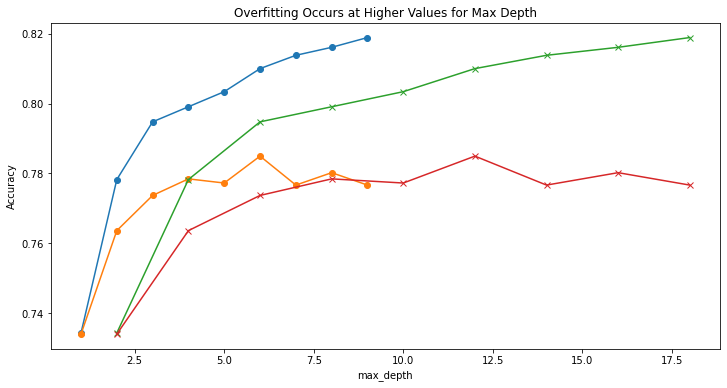

In [128]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.plot(df.min_samples_leaf, df.train_accuracy, marker = 'x')
plt.plot(df.min_samples_leaf, df.validate_accuracy, marker = 'x')

plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [129]:
#min leaf 12 max depth 6 produced train = 0.810008 validate = 0.784953 difference of 0.025055
#greater than 73.4 baseline

In [130]:
#knn model

In [131]:
# Create KNN Object
knn4 = KNeighborsClassifier(n_neighbors=4, weights='uniform')

In [132]:
# Fit the Model to the Training Data
knn4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [133]:
# Make Predictions
y_pred = knn4.predict(X_train)
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [134]:
y_train[:10]

,churn_encoded
5919,0
1915,0
5054,0
2355,0
6279,0
6992,1
3614,0
4352,0
6845,1
3782,0


In [135]:
# Estimate Probability
y_pred_proba = knn4.predict_proba(X_train)
y_pred_proba[:10]

array([[0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [1.  , 0.  ]])

In [136]:
# Evaluate Model

In [137]:
# Compute the Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn4.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.84


In [138]:
# confusion matrix
print(confusion_matrix(y_train, y_pred))

[[2788  103]
 [ 543  503]]


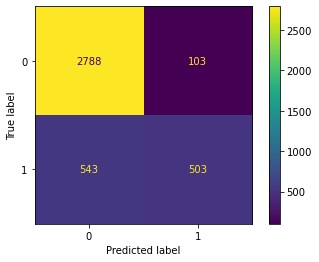

In [139]:
#plot confusion matrix
plot_confusion_matrix(knn4, X_train, y_train)

In [140]:
#true neg, false pos, false neg, true pos with.ravel method, works on confusion matrix 2x2
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(2788, 103, 543, 503)

In [141]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())


Negative Cases: 2891
Positive Cases: 1046
churn_encoded
0                2891
1                1046
dtype: int64


In [142]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8359156718313436 

True Positive Rate/Sensitivity/Recall/Power: 0.4808795411089866 

False Positive Rate/False Alarm Ratio/Fall-out: 0.03562781044621238 

True Negative Rate/Specificity/Selectivity: 0.9643721895537876 

False Negative Rate/Miss Rate: 0.5191204588910134 

Precision/PPV: 0.83003300330033 

F1 Score: 0.6089588377723971 

Support (0): 2891 

Support (1): 1046


In [143]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2891
           1       0.83      0.48      0.61      1046

    accuracy                           0.84      3937
   macro avg       0.83      0.72      0.75      3937
weighted avg       0.84      0.84      0.82      3937



In [144]:
# loop to adjust neighbors
for i in range(1, 21):
    # Make the model
    knntest = KNeighborsClassifier(n_neighbors=i, weights='uniform')

    # Fit the model (on train and only train)
    knntest = knntest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = knntest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"KNN with neighbor value of {i}")
    print(pd.DataFrame(report))
    print()

KNN with neighbor value of 1
                     0            1  accuracy    macro avg  weighted avg
precision     0.994128     0.987524   0.99238     0.990826      0.992373
recall        0.995503     0.983748   0.99238     0.989625      0.992380
f1-score      0.994815     0.985632   0.99238     0.990224      0.992375
support    2891.000000  1046.000000   0.99238  3937.000000   3937.000000

KNN with neighbor value of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.845816     1.000000  0.866142     0.922908      0.886780
recall        1.000000     0.496176  0.866142     0.748088      0.866142
f1-score      0.916469     0.663259  0.866142     0.789864      0.849195
support    2891.000000  1046.000000  0.866142  3937.000000   3937.000000

KNN with neighbor value of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.889369     0.769148  0.861062     0.829258      0.857428
recall        0.925977     0.681644

In [145]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,50):
    knntest = KNeighborsClassifier(n_neighbors=i, weights='uniform') #make model 

    knntest = knntest.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=knntest.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = knntest.score(X_validate, y_validate)#use model on validate
    
    output = {
        "neighbors":i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

,neighbors,train_accuracy,validate_accuracy,difference
0,1,0.992380,0.706754,0.285626
1,2,0.866142,0.749408,0.116734
2,3,0.861062,0.735782,0.125280
3,4,0.835916,0.751185,0.084731
4,5,0.829312,0.748223,0.081089
5,6,0.823216,0.764810,0.058405
6,7,0.821946,0.759479,0.062467
7,8,0.816104,0.762441,0.053663
8,9,0.817120,0.766588,0.050532
9,10,0.814834,0.771919,0.042914


In [146]:
#21 nieghbors with train = 0.802388 and validate = 0.779621 with a difference of 0.022767
#compared to 73.4% baseline

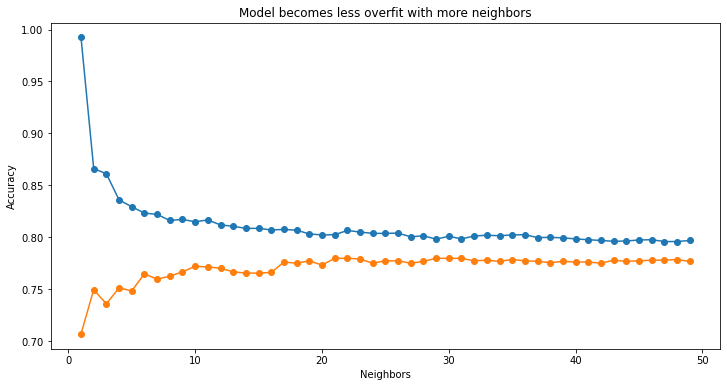

In [147]:
plt.figure(figsize=(12, 6))
plt.plot(df.neighbors, df.train_accuracy, marker = 'o')
plt.plot(df.neighbors, df.validate_accuracy, marker = 'o')
plt.title('Model becomes less overfit with more neighbors')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [148]:
#logistic regression

In [149]:
# create the object
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

In [150]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [151]:
# Make Predictions
y_pred = logit.predict(X_train)
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [152]:
# Make Predictions
y_pred = logit.predict(X_train)
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [153]:
y_train[:10]

,churn_encoded
5919,0
1915,0
5054,0
2355,0
6279,0
6992,1
3614,0
4352,0
6845,1
3782,0


In [154]:
# Estimate Probability
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[:10]

array([[0.96151298, 0.03848702],
       [0.9219365 , 0.0780635 ],
       [0.8999329 , 0.1000671 ],
       [0.82362179, 0.17637821],
       [0.83986273, 0.16013727],
       [0.35898941, 0.64101059],
       [0.96381626, 0.03618374],
       [0.59307019, 0.40692981],
       [0.47958916, 0.52041084],
       [0.97901019, 0.02098981]])

In [155]:
#evaluate model
# Compute the Accuracy
print('Accuracy of logistic regression model on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of logistic regression model on training set: 0.80


In [156]:
#true neg, false pos, false neg, true pos with.ravel method, works on confusion matrix 2x2
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(2602, 289, 512, 534)

In [157]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 2891
Positive Cases: 1046
churn_encoded
0                2891
1                1046
dtype: int64


In [158]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7965455930911862 

True Positive Rate/Sensitivity/Recall/Power: 0.5105162523900574 

False Positive Rate/False Alarm Ratio/Fall-out: 0.09996540989277067 

True Negative Rate/Specificity/Selectivity: 0.9000345901072293 

False Negative Rate/Miss Rate: 0.4894837476099426 

Precision/PPV: 0.6488456865127582 

F1 Score: 0.5714285714285715 

Support (0): 2891 

Support (1): 1046


In [159]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2891
           1       0.65      0.51      0.57      1046

    accuracy                           0.80      3937
   macro avg       0.74      0.71      0.72      3937
weighted avg       0.79      0.80      0.79      3937



In [160]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,10):
    logit = LogisticRegression(C=1/i**i, random_state=123, solver='saga') #make model 

    logit = logit.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=logit.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = logit.score(X_validate, y_validate)#use model on validate
    
    output = {
        "c value":1/i**i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

,c value,train_accuracy,validate_accuracy,difference
0,1.000000e+00,0.795530,0.787322,0.008207
1,2.500000e-01,0.795276,0.787322,0.007953
2,3.703704e-02,0.794260,0.783768,0.010492
3,3.906250e-03,0.793752,0.784360,0.009391
4,3.200000e-04,0.786894,0.765995,0.020898
5,2.143347e-05,0.788418,0.776066,0.012351
6,1.214266e-06,0.734315,0.734005,0.000311
7,5.960464e-08,0.734315,0.734005,0.000311
8,2.581175e-09,0.734315,0.734005,0.000311


In [161]:
# All features, all default hyperparameters
logit2 = LogisticRegression(random_state=123)

logit2.fit(X_train, y_train)

y_pred = logit2.predict(X_train)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.3f}'
     .format(logit2.score(X_train, y_train)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.797


In [162]:
# All features, but we'll use the class_weights to hold the actual ratios`
logit3 = LogisticRegression(random_state=123, class_weight='balanced')

logit3.fit(X_train, y_train)

y_pred = logit3.predict(X_train)

accuracy = logit3.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.74


In [163]:
# Only tenure and monthly charges 
features = ['tenure', 'monthly_charges']


logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("Only tenure and monthly charges Features ")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

Only tenure and monthly charges Features 
Accuracy of Logistic Regression classifier on training set: 0.78


In [164]:
# Only 'senior_citizen','tenure', 'contract_type_One year','internet_service_type_Fiber optic'
features = [ 'senior_citizen','tenure', 'contract_type_One year','internet_service_type_Fiber optic']

# All features, but we'll use the class_weights to hold the actual ratios
logit5 = LogisticRegression( random_state=123)

logit5.fit(X_train[features], y_train)

y_pred = logit5.predict(X_train[features])
accuracy = logit5.score(X_train[features], y_train)

print("Only senior_citizen, tenure, contract_type_One year', internet_service_type_Fiber optic")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.3}')

Only senior_citizen, tenure, contract_type_One year', internet_service_type_Fiber optic
Accuracy of Logistic Regression classifier on training set: 0.792


In [165]:
# Only 'monthly_charges','payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check'
features = [ 'monthly_charges','payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']

# All features, but we'll use the class_weights to hold the actual ratios
logit6 = LogisticRegression( random_state=123)

logit6.fit(X_train[features], y_train)

y_pred = logit6.predict(X_train[features])
accuracy = logit6.score(X_train[features], y_train)

print("monthly_charges, payment_type_Credit card (automatic), payment_type_Electronic check, payment_type_Mailed check features")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

monthly_charges, payment_type_Credit card (automatic), payment_type_Electronic check, payment_type_Mailed check features
Accuracy of Logistic Regression classifier on training set: 0.72


In [166]:
# All Features, C ~ 0
# All features, but we'll use the class_weights to hold the actual ratios
features = ['senior_citizen', 'tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']

logit6 = LogisticRegression(random_state=123, C=0.0001)

logit6.fit(X_train, y_train)

y_pred = logit6.predict(X_train)
accuracy = logit6.score(X_train, y_train)

print("All Features, C hyperparameter approaching 0")
print("Baseline is", round(baseline_accuracy, 2))
print(f'Accuracy of this Logistic Regression on training set: {accuracy:.2}')

All Features, C hyperparameter approaching 0
Baseline is 0.73
Accuracy of this Logistic Regression on training set: 0.79


In [167]:
# Now Let's Pick our Best Models and Evaluate on Validate!
# logit trained with  all features features and has .80 accuracy on train
# logit4 trained on features = [ 'senior_citizen','tenure', 'contract_type_One year','internet_service_type_Fiber optic'] has .79 accuracy
# logit6 trained on all features with c value approaching 0 has a .79 accuracy

In [168]:
#logit validate
features = ['senior_citizen', 'tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']


y_pred = logit.predict(X_validate[features])

print('Logit model using all features')
print(classification_report(y_validate, y_pred))

Logit model using all features
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1239
           1       0.00      0.00      0.00       449

    accuracy                           0.73      1688
   macro avg       0.37      0.50      0.42      1688
weighted avg       0.54      0.73      0.62      1688



In [169]:
#logit4 validate
features = ['tenure', 'monthly_charges']

y_pred = logit4.predict(X_validate[features])

print('Only tenure and monthly charges as the features')
print(classification_report(y_validate, y_pred))

Only tenure and monthly charges as the features
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1239
           1       0.60      0.45      0.52       449

    accuracy                           0.77      1688
   macro avg       0.71      0.67      0.69      1688
weighted avg       0.76      0.77      0.76      1688



In [170]:
#logit6 validate
features = ['senior_citizen', 'tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']
y_pred = logit6.predict(X_validate[features])
print('Logit1 model using age, pclass, fare, and is_female as the features')
print(classification_report(y_validate, y_pred))

Logit1 model using age, pclass, fare, and is_female as the features
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1239
           1       0.60      0.45      0.51       449

    accuracy                           0.77      1688
   macro avg       0.71      0.67      0.68      1688
weighted avg       0.76      0.77      0.76      1688



In [171]:
#test

In [197]:
get_metrics(rf, X_test, y_test)


        The accuracy for our model is: 79.74% 
    


,0,1
precision,0.841241,0.643087
recall,0.892546,0.534759
f1-score,0.866134,0.583942
support,1033.000000,374.000000


In [173]:
#predict On Test Model
#In order to create predictions on the entire df, I will need to acquire a fresh version of my TELCO data set.

In [174]:
# Acquire data
telco = acquire.get_telco_data()

In [175]:
# Clean & prep data
telco = prepare.prep_telco_data(telco)

In [176]:
# Double check it looks correct
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   monthly_charges                        7032 non-null   float64
 3   total_charges                          7032 non-null   float64
 4   churn                                  7032 non-null   object 
 5   contract_type                          7032 non-null   object 
 6   internet_service_type                  7032 non-null   object 
 7   payment_type                           7032 non-null   object 
 8   gender_encoded                         7032 non-null   int64  
 9   partner_encoded                        7032 non-null   int64  
 10  dependents_encoded                     7032 non-null   int64  
 11  phon

In [177]:
#remove all the columns that werent used as features

In [178]:
dropcols = ['total_charges', 'churn', 'contract_type', 'internet_service_type', 
            'payment_type', 'gender_encoded', 'partner_encoded', 'dependents_encoded', 
            'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded', 
            'multiple_lines_No phone service', 'multiple_lines_Yes', 
            'online_security_No internet service', 'online_security_Yes', 
            'online_backup_No internet service', 'online_security_Yes', 
            'online_backup_No internet service', 'online_backup_Yes', 
            'device_protection_No internet service', 'device_protection_Yes', 
            'tech_support_No internet service', 'tech_support_Yes', 
            'streaming_tv_No internet service', 'streaming_tv_Yes', 
            'streaming_movies_No internet service','streaming_movies_Yes']


In [179]:
# # Dropcols
telco.drop(columns= dropcols, inplace=True)

In [180]:
#run my final model rf on my telco df to create a new dataframe of all predicted Probability of churn.
churn_probability=pd.DataFrame({'churn_probability': rf.predict_proba(telco)[:,1]})

In [181]:
churn_probability.head()

,churn_probability
0,0.140995
1,0.216493
2,0.678456
3,0.710406
4,0.635784


In [182]:
#created a new column in my telco df that contains a boolean prediction of churn per customer.
telco['prediction'] = rf.predict(telco)

In [183]:
#slice that column off into it's own dataframe.
churn_pred = pd.DataFrame(telco['prediction'])
churn_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  7032 non-null   int64
dtypes: int64(1)
memory usage: 109.9 KB


In [184]:
# Export Predictions to CSV

In [185]:
# Now there are two dataframes of my predictions and their probabilities, 
# need to create one last dataframe of the customer_ids.

In [186]:
customer_id = pd.DataFrame(acquire.get_telco_data()['customer_id'])
customer_id.head()

,customer_id
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ


In [187]:
# concatenate the three columns into a single dataframe.

In [188]:
predictions = pd.concat([customer_id, churn_probability, churn_pred], axis =1)

In [189]:
predictions.head()

,customer_id,churn_probability,prediction
0,0002-ORFBO,0.140995,0.0
1,0003-MKNFE,0.216493,0.0
2,0004-TLHLJ,0.678456,1.0
3,0011-IGKFF,0.710406,1.0
4,0013-EXCHZ,0.635784,1.0


In [190]:
#create a CSV version of final dataframe.

In [191]:
predictions.to_csv('predictions.csv')

## Conclusion/Summary
#### Customer churn is a complex target variable, however, through extensive data analysis and modeling, we were able to discover the leading drivers of churn at Telco. We found that contract type of month to month, monthly charges, internet service type of fiber optic, and payment type of electronic checks were the biggest driver. It is my estimate that a combination of high cost for fiber for the month to month customers that utilize electronic checks were the biggest contributing factors to churn.


## Next Steps
#### In order to make the most impact with regards to reducing customer churn, we should strive to lower the monthly rate fiber customers to at least the average monthly rate of the customer base. If we can incentivize with a lower monthly rate if the customer signs up for a 12 or 24 month contract utilizing auto bill pay, we can hit the majority of the factors impacting churn and increase overall customer retention.